<a href="https://colab.research.google.com/github/AshbeeKim/Kaggle_task/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/data/kaggle"   
from google.colab import drive  
drive.mount('/content/drive')  
!cd /content/drive/MyDrive/data/kaggle  
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip train.zip
!unzip test.zip
!unzip sample_submission.zip
!ls  

Mounted at /content/drive
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 22.9MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.3MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.3MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.9MB/s]
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open sample_submission.zip, sample_submission.zip.zip or sample_submission.zip.ZIP.
data_description.txt  sample_data	     test.csv
drive		      sample_submission.csv  train.csv


## File descriptions
*  train.csv - the training set
*  test.csv - the test set
*  data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
*  sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
# import mglearn
import graphviz
import warnings
warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# 최대 줄 수 설정
pd.set_option('display.max_rows', 1500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 1500)
# 표시할 가로의 길이
pd.set_option('display.width', 1500)

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
samplesubmisssion = pd.read_csv('./sample_submission.csv')

data = train.copy()
df = test.copy()
sS = samplesubmisssion.copy()

In [4]:
print(data.shape)
print(test.shape)
print(samplesubmisssion.shape)
print('='*150)
print(data.info())
print(test.info())
print(samplesubmisssion.info())

(1460, 81)
(1459, 80)
(1459, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

=> submission이 id별 SalesPrice맞추는 것

=> test에는 SalesPrice만 없음(test에는 항상 정답은 없어야 함)

=> id가 맞지 않음(train은 1부터 1460, test,subsmission는 1461부터 2919까지)

In [5]:
print('='*150)
print(data.describe().round(3))
print('-'*150)
print(test.describe().round(3))
print('-'*150)
print(samplesubmisssion.describe().round(3))
#Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
#Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
#Id,SalesPrice

            Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold    YrSold   SalePrice
count  1460.00    1460.000     1201.000    1460.000     1460.000     1460.000   1460.000      1460.000    1452.000    1460.000    1460.000   1460.000     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000      1460.000  1460.000  1460.000      1460.000      1460.000      1460.000    1460.000     1379.000    1460.000    1460.000    1460.000     1460.000       1460.000   1460.000     1460.000  1460.000   1460.000  1460.000  1460.000    1460.000
mean    730.50      56.897       70.050   10516.828        6.099        

In [6]:
print(data.columns) #'dropoff_datetime', 'trip_duration'는 test에 없고 train에만 있는 데이터, samplesubmission에는 'id'와 'trip_duration'만 있음
print('-'*250)
print(test.columns)
print('-'*250)
print(samplesubmisssion.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'P

In [7]:
print(data.head())
print(data.tail())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside   

In [8]:
print(test.head())
print(test.tail())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition
0  1461          20       RH         80.0    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gt

In [9]:
print(samplesubmisssion.head())
print(samplesubmisssion.tail())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977
        Id      SalePrice
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657


## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other * categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [10]:
all_columns = data.columns.values

non_categorical = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                   'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                   '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                   'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                   '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

categorical = [value for value in all_columns if value not in non_categorical]

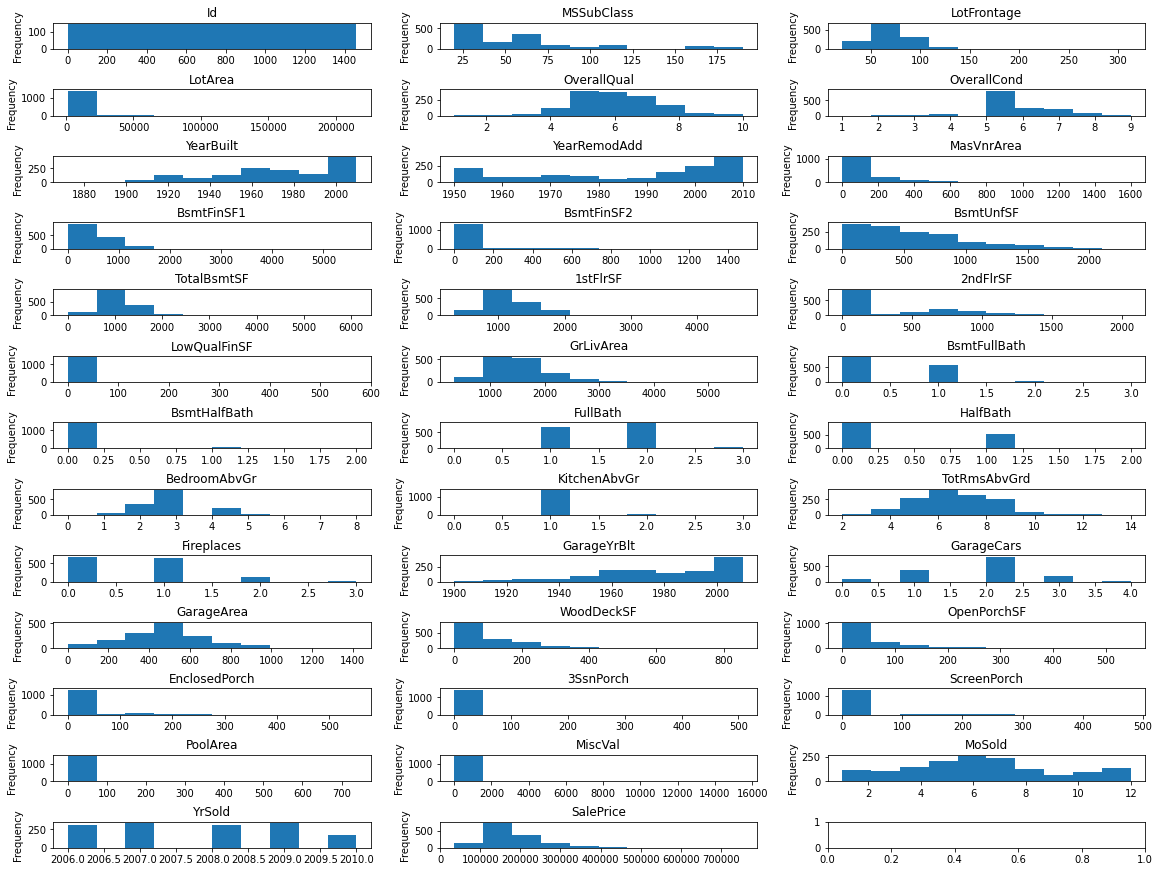

In [11]:
n = len(data[non_categorical].columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(13,n//10,figsize=(16,12),constrained_layout=True)

for i, col in enumerate(data[non_categorical].columns):
  data[col].plot(kind='hist',ax=ax[i//3,i%3],title=col)
plt.show()  

In [12]:
data.corr()[data.corr()['SalePrice']>=0.5]['SalePrice'][:-1]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

In [13]:
data.corr()[data.corr()['OverallQual']>=0.5]['OverallQual']

OverallQual     1.000000
YearBuilt       0.572323
YearRemodAdd    0.550684
TotalBsmtSF     0.537808
GrLivArea       0.593007
FullBath        0.550600
GarageYrBlt     0.547766
GarageCars      0.600671
GarageArea      0.562022
SalePrice       0.790982
Name: OverallQual, dtype: float64

In [14]:
df.corr()[df.corr()['OverallQual']>=0.5]['OverallQual']

OverallQual     1.000000
YearBuilt       0.621910
YearRemodAdd    0.591267
TotalBsmtSF     0.560314
GrLivArea       0.558599
FullBath        0.507580
GarageYrBlt     0.593080
GarageCars      0.600831
GarageArea      0.568161
Name: OverallQual, dtype: float64

In [15]:
corr_data_above5 = []
corr_df_above5 = []
for i in data.corr()[data.corr()['OverallQual']>=0.5]['OverallQual'][:-1].index:
  corr_data_above5.append(i)
  corr_df_above5.append(i)

for i in ['1stFlrSF','TotRmsAbvGrd']:
  corr_data_above5.append(i)
  corr_df_above5.append(i)

corr_data_above5.append('SalePrice')

In [16]:
data[corr_data_above5+categorical].isna().sum()

OverallQual         0
YearBuilt           0
YearRemodAdd        0
TotalBsmtSF         0
GrLivArea           0
FullBath            0
GarageYrBlt        81
GarageCars          0
GarageArea          0
1stFlrSF            0
TotRmsAbvGrd        0
SalePrice           0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType

LotFrontage : 259

MasVnrArea : 8

GarageYrBlt : 81

Alley : 1369

MasVnrType : 8

BsmtQual : 37

BsmtCond : 37

BsmtExposure : 38

BsmtFinType1 : 37

BsmtFinType2 : 38

Electrical : 1

FireplaceQu : 690

GarageType : 81

GarageFinish : 81

GarageQual : 81

GarageCond : 81

PoolQC : 1453

Fence : 1179

MiscFeature : 1406

In [17]:
#numeric데이터는 평균값으로 바꿈
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data.GarageYrBlt.mean())

In [18]:
for i in data[corr_data_above5+categorical]:
  if data[i].isna().sum()!=0:
    print(data[i].unique())
    print(data[i].describe())

[nan 'Grvl' 'Pave']
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
['Gd' 'TA' 'Ex' nan 'Fa']
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
['TA' 'Gd' nan 'Fa' 'Po']
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
['No' 'Gd' 'Mn' 'Av' nan]
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: obje

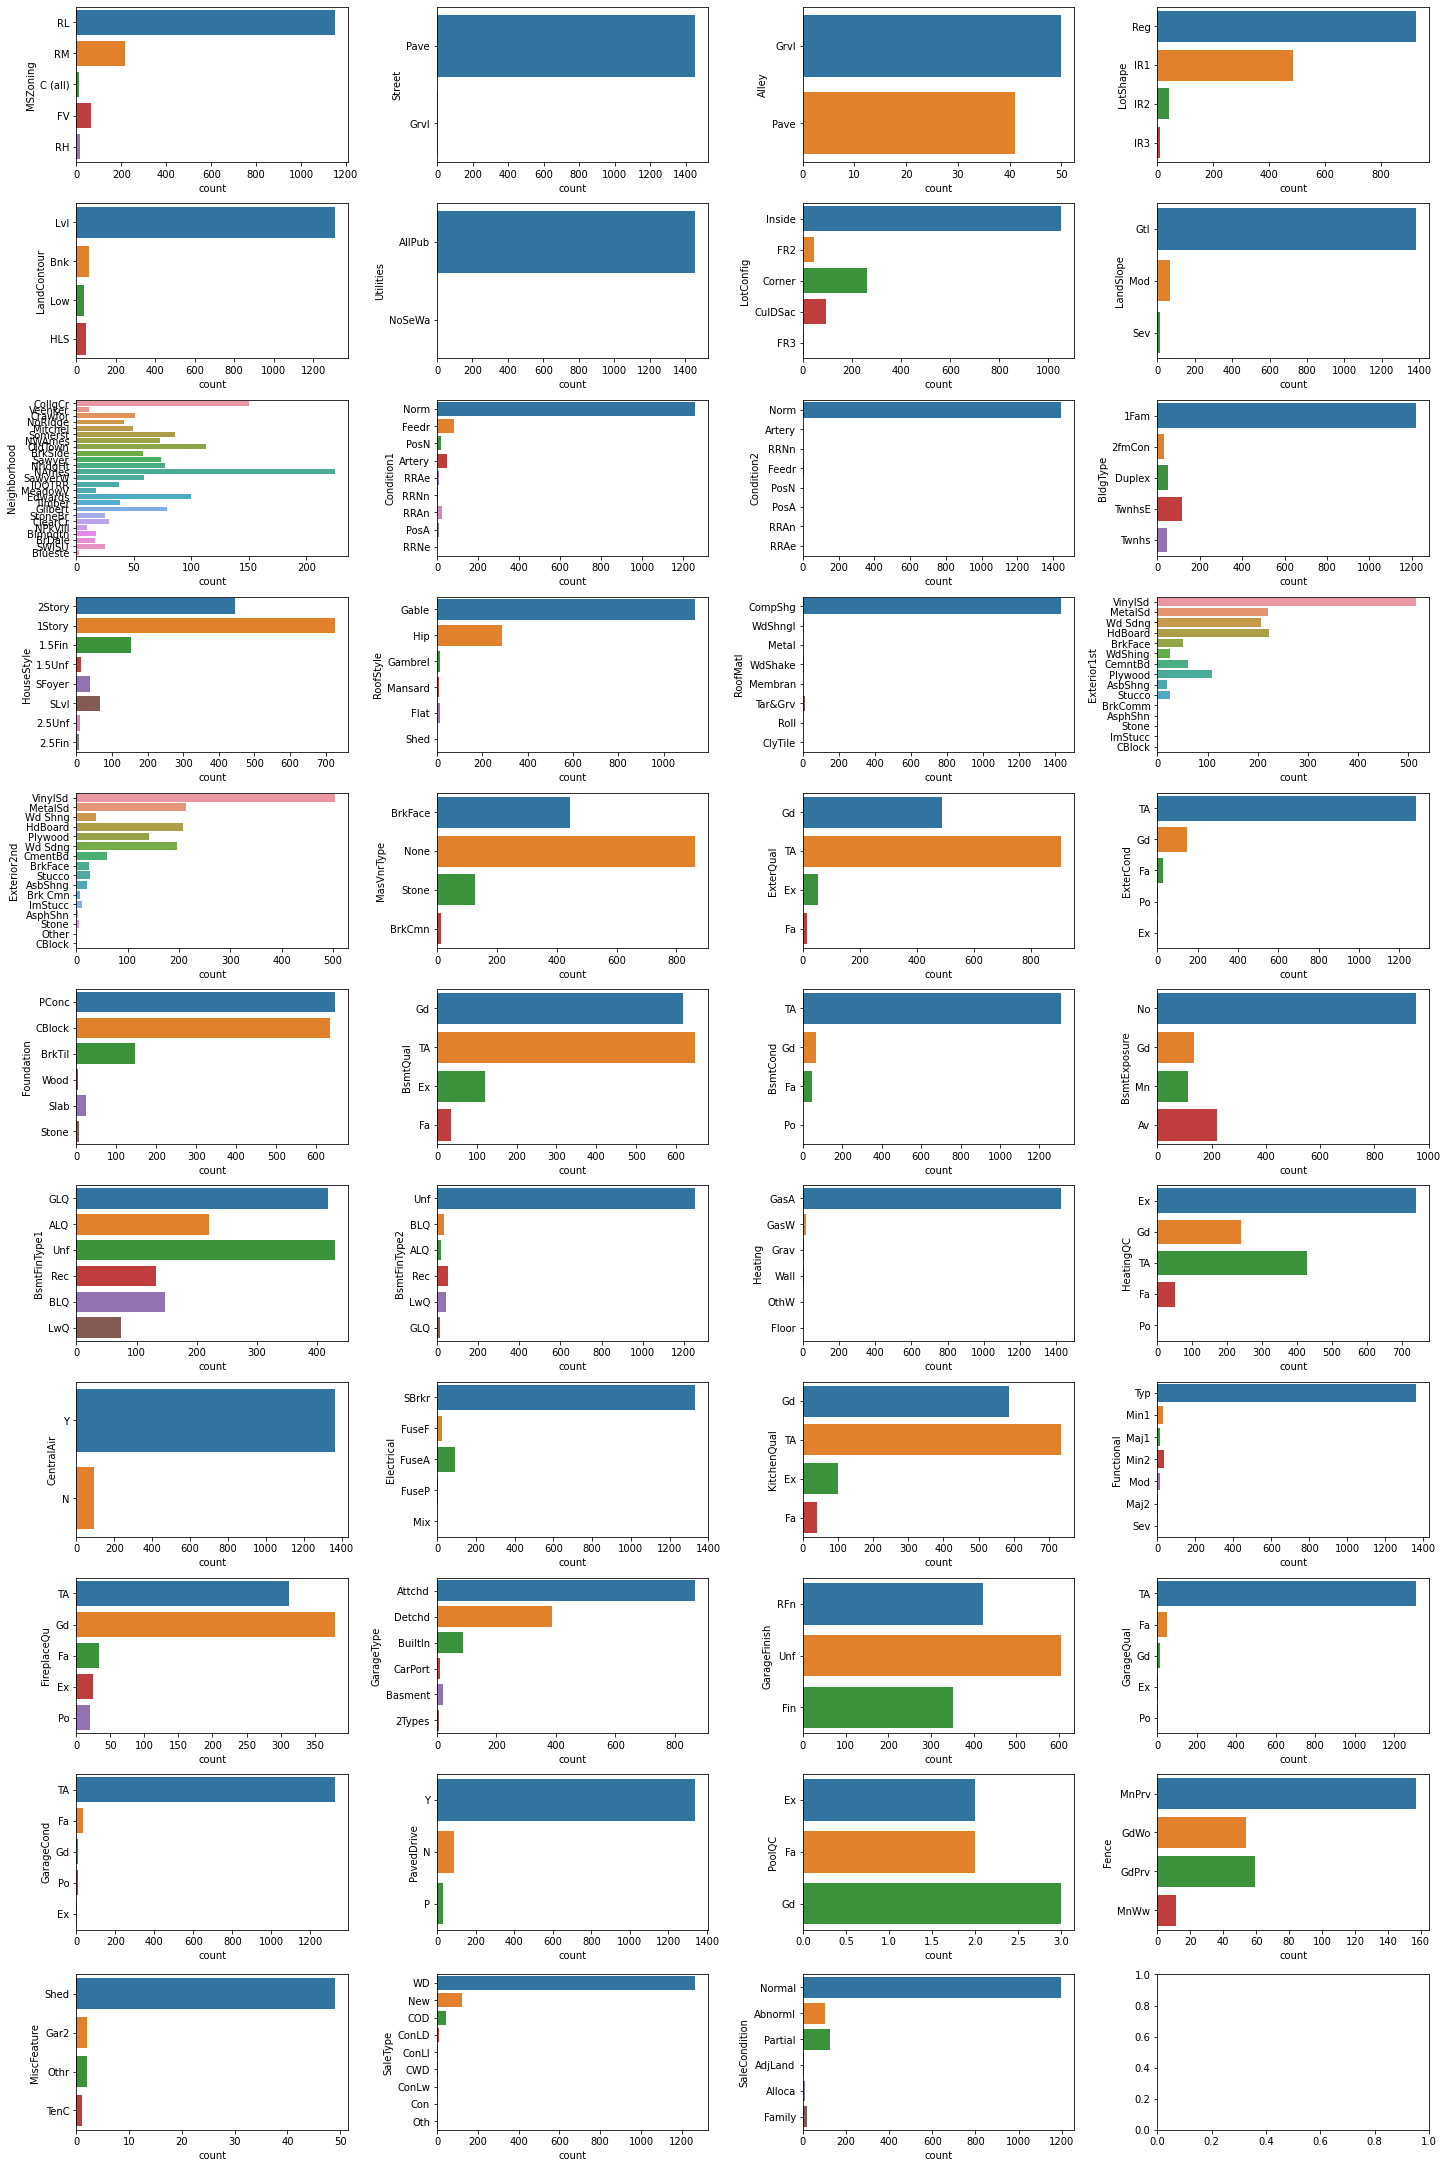

In [19]:
n = len(data[categorical].columns)
# f, ax = plt.subplots(n//3,n//10,figsize=(16,12))  # 다 못보여준다며 error남
f, ax = plt.subplots(11,n//10,figsize=(20,30),constrained_layout=True)

for i, col in enumerate(data[categorical].columns):
  sns.countplot(y=col,ax=ax[i//4,i%4],data=data[categorical])
plt.show()  

In [20]:
#null이 많아서 drop함
data = data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [21]:
#unique에 None이 있는 경우
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [22]:
all_columns = data.columns.values

non_categorical = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                   'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                   '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                   'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                   '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

categorical = [value for value in all_columns if value not in non_categorical]

In [23]:
#unique()에서 random하게 부여
for i in data[corr_data_above5+categorical]:
  if data[i].isna().sum()!=0:
    for j in data[i]:
      if type(j)==float:
        for l in data[i].unique():
          data[i] = data[i].replace(j,l)

### df.isna().sum()

In [24]:
df[corr_df_above5].isna().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      1
GrLivArea        0
FullBath         0
GarageYrBlt     78
GarageCars       1
GarageArea       1
1stFlrSF         0
TotRmsAbvGrd     0
dtype: int64

In [25]:
#사용할 numeric데이터 결측치 mean으로 채움
for i in df[corr_df_above5]:
  if df[i].isna().sum()!=0:
    df[i] = df[i].fillna(df[i].mean())

In [26]:
#train과 맞춰줘야해서 같이 드롭함
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [27]:
all_columns_df = df.columns.values

non_categorical_df = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                   'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                   '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                   'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                   '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

categorical_df = [value for value in all_columns if value not in non_categorical]

In [28]:
for i in df[categorical_df]:
  if df[i].isna().sum()!=0:
    print(i)
    print(df[i].unique())
    print(df[i].describe())

MSZoning
['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object
Utilities
['AllPub' nan]
count       1457
unique         1
top       AllPub
freq        1457
Name: Utilities, dtype: object
Exterior1st
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object
Exterior2nd
['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
count        1458
unique         15
top       VinylSd
freq          510
Name: Exterior2nd, dtype: object
MasVnrType
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
count     1443
unique       4
top       None
freq       878
Name: MasVnrType, dtype: object
BsmtQual
['TA' 'Gd' 'Ex' 'Fa' nan]
count     1415
unique       4
top       

In [29]:
#unique에 None이 있는 경우
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [30]:
df['GarageArea'].describe()

count    1459.000000
mean      472.768861
std       216.974165
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [31]:
for i in df[categorical_df]:
  if df[i].isna().sum()!=0:
    for j in df[i]:
      if type(j)==float:
        for l in df[i].unique():
          df[i] = df[i].replace(j,l)

#Test,Train

In [93]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in data[categorical].columns:
  data[i] = LE.fit_transform(data[i])
for j in df[categorical_df].columns:
  df[j] = LE.fit_transform(df[j])

In [60]:
trn = data[corr_data_above5+categorical]
tst = df[corr_df_above5+categorical_df]

In [94]:
y_trn = trn.copy().SalePrice
X_trn = trn.copy().drop('SalePrice',axis=1)
y_tst = sS.copy().SalePrice
X_tst = tst.copy()

In [95]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
#whiten : 들어오는 input의 feature들을 uncorrelattion하게 만들고, 각각의 variation를 1로 만들어주는 작업

# pca.fit(X_trn,y_trn)
pca.fit(X_trn)

pca = PCA(n_components=36,whiten=True)
# pca = pca.fit(X_trn,y_trn)
pca = pca.fit(X_trn)
trainPCA = pca.transform(X_trn)

In [96]:
X_trn.shape

(1460, 49)

In [97]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import explained_variance_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, r2_score, roc_auc_score, auc,confusion_matrix)

In [98]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_trn,y_trn)

[05:03:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [108]:
y_tst.shape

(1459,)

In [109]:
y_pred.shape

(1459,)

In [106]:
type(y_tst)

pandas.core.series.Series

In [107]:
type(y_pred)

numpy.ndarray

In [104]:
score = model.score(X_trn, y_trn)
accry = metrics.accuracy_score(y_tst,y_pred)
# precs = metrics.precision_score(y_tst,y_pred)
# recal = metrics.recall_score(y_tst,y_pred)
# f1scr = metrics.f1_score(y_tst,y_pred)
# r2scr = metrics.r2_score(y_tst,y_pred)
# roc = metrics.roc_auc_score(y_tst,y_pred)
# auc = metrics.auc(y_tst,y_pred)
# matrix = metrics.confusion_matrix(y_tst,y_pred)
# expvarscore = explained_variance_score(y_pred,y_tst)
expvarscore = explained_variance_score(y_tst,y_pred)

ValueError: ignored

In [103]:
print(f'Score : {score}')
print(f'Variance_score : {expvarscore}')
# print(f'{}')
# print(f'{}')
# print(f'{}')
# print(f'{}')
# print(f'{}')
# print(f'{}')
# print(f'{}')
# print(f'{}')
# print(f'{}')

Score : 0.9523134173150369
Variance_score : -18.985036523369292


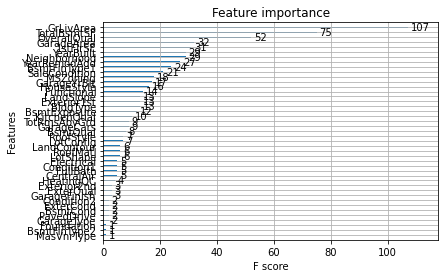

In [65]:
xgb.plot_importance(model)

In [66]:
y_pred = model.predict(X_tst)

In [67]:
score = model.score(X_trn, y_trn)
accry = metrics.accuracy_score(y_tst,y_pred)
precs = metrics.precision_score(y_tst,y_pred)
recal = metrics.recall_score(y_tst,y_pred)
f1scr = metrics.f1_score(y_tst,y_pred)
roc = metrics.roc_auc_score(y_tst,y_pred)
auc = metrics.auc(y_tst,y_pred)
matrix = metrics.confusion_matrix(y_tst,y_pred)
expvarscore = explained_variance_score(y_pred,y_tst)

0.9523134173150369


NameError: ignored

In [61]:
print(trn.shape)
print(tst.shape)

(1460, 50)
(1459, 49)


In [62]:
print(trn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   YearBuilt      1460 non-null   int64  
 2   YearRemodAdd   1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   GrLivArea      1460 non-null   int64  
 5   FullBath       1460 non-null   int64  
 6   GarageYrBlt    1460 non-null   float64
 7   GarageCars     1460 non-null   int64  
 8   GarageArea     1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  TotRmsAbvGrd   1460 non-null   int64  
 11  SalePrice      1460 non-null   int64  
 12  MSZoning       1460 non-null   int64  
 13  Street         1460 non-null   int64  
 14  LotShape       1460 non-null   int64  
 15  LandContour    1460 non-null   int64  
 16  Utilities      1460 non-null   int64  
 17  LotConfig      1460 non-null   int64  
 18  LandSlop

In [49]:
x=0
for i in trn.columns:
  x+=1
  print(i)
print(x) 
print('='*250)  
y=0
for j in tst.columns:
  y+=1
  print(j)
print(y)  

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
GrLivArea
FullBath
GarageYrBlt
GarageCars
GarageArea
1stFlrSF
TotRmsAbvGrd
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood

In [33]:
# trn = pd.get_dummies(trn)
# tst = pd.get_dummies(tst)

# #missing_value
# from sklearn.impute import SimpleImputer

# imp1 = SimpleImputer(missing_value=np.nan,strategy = 'most_frequent',axis=0)
# imp2 = SimpleImputer(missing_value=np.inf,strategy = 'most_frequent',axis=0)
# trn = imp1.fit_transform(trn)
# trn = imp2.fit_transform(trn)
# tst = imp1.fit_transform(tst)
# tst = imp2.fit_transform(tst)

# #log transformating
# data = np.log(data)
# labels = np.log(labels)
# data = np.log(data)
# labels = np.log(labels)

# #int->0(using log)
# data[data==np.inf]=0

In [47]:
for i in X_trn.columns:
  print(i)
print('='*250)  
for j in X_tst.columns:
  print(j)

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
GrLivArea
FullBath
GarageYrBlt
GarageCars
GarageArea
1stFlrSF
TotRmsAbvGrd
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
C

In [36]:
X_tst.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', '1stFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=229)

In [37]:
# from sklearn.decomposition import PCA

# pca = PCA(whiten=True)
# #whiten : 들어오는 input의 feature들을 uncorrelattion하게 만들고, 각각의 variation를 1로 만들어주는 작업

# # pca.fit(X_trn,y_trn)
# pca.fit(X_trn)

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(whiten=True)
# #whiten : 들어오는 input의 feature들을 uncorrelattion하게 만들고, 각각의 variation를 1로 만들어주는 작업

# # pca.fit(X_trn,y_trn)
# pca.fit(X_trn)

# pca = PCA(n_components=36,whiten=True)
# # pca = pca.fit(X_trn,y_trn)
# pca = pca.fit(X_trn)
# trainPCA = pca.transform(X_trn)

In [38]:
# pca = PCA(n_components=36,whiten=True)
# # pca = pca.fit(X_trn,y_trn)
# pca = pca.fit(X_trn)
# trainPCA = pca.transform(X_trn)

In [43]:
# #R^2 squared defination
# from sklearn.model_selection import KFold
# from sklearn.metrics import make_scorer
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

# def Squared(train, labels):
#   results = {}
#   def test_model(clf):
#     cv = KFold(n_split=5, shuffle=True, random_stage=42)
#     r2 = make_scorer(r2_score)
#     r2_val_score = cross_val_score(clf.train, labels=cv, scoring=12)

#     clf = LinearRegresssion()
#     result['Linear'] = test_model(clf)

#     clf = Ridge()
#     result['Ridge'] = test_model(clf)

#     clf = BaggingRegresssor()
#     result['Bagging'] = test_model(clf)

#     clf = RandomForestRegresssor()
#     result['RandomForest'] = test_model(clf)

#     clf = AdaBoostRegressor()
#     result['AdaBoost'] = test_model(clf)

#     clf = GradientBoostingRegressor()
#     result['GradientBoosting'] = test_model(clf)

#     clf = SVR()
#     result['SVR'] = test_model(clf)

#     clf = XGBRegressor()
#     result['XGB'] = test_model(clf)

#     clf = LGBMRegressor()
#     result['LightGBM'] = test_model(clf)

#     clf = CatBoostRegressor()
#     result['CatBoost'] = test_model(clf)

#     result = pd.DataFrame.from_dict(result, orient='index')
#     result.columns = ['R square Score']
#     result = result.sort(columns = ['R square Score'])

In [44]:
# Squared(X_trn,y_trn)

# 강사님 flow 따라갔었던 것

## isna.sum()__drop or fillna(0)
### non_categorical ~ .isna().sum()
* LotFrontage : 259
* MasVnrArea : 8
* GarageYrBlt : 81

### categorical ~ .isna().sum()
* **Alley : 1369** [nan 'Grvl' 'Pave']
* **MasVnrType : 8** ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
* **BsmtQual : 37** ['Gd' 'TA' 'Ex' nan 'Fa']
* **BsmtCond : 37** ['TA' 'Gd' nan 'Fa' 'Po']
* **BsmtExposure : 38** ['No' 'Gd' 'Mn' 'Av' nan]
* **BsmtFinType1 : 37** ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
* **BsmtFinType2 : 38** ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
* **Electrical : 1** ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
* **FireplaceQu : 690** [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
* **GarageType : 81** ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
* **GarageFinish : 81** ['RFn' 'Unf' 'Fin' nan]
* **GarageQual : 81** ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
* **GarageCond : 81** ['TA' 'Fa' nan 'Gd' 'Po' 'Ex'
* **PoolQC : 1453** [nan 'Ex' 'Fa' 'Gd']
* **Fence : 1179** [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
* **MiscFeature : 1406** [nan 'Shed' 'Gar2' 'Othr' 'TenC']

Alley의 값에 NaN이 있는 것에 반해, Street에는 NaN값이 없으며, 동일한 값으로 구별됨

In [45]:
# train_data = data[:1460]
# test_data = data[1460:]

classification plots

[link] https://datascienceplus.com/machine-learning-results-one-plot-to-rule-them-all/